# Maestría en "Analítica de datos"
---
Nombre: Jader Antonio Gomez Orrego Código: 1018422976

Fecha: 2025 agosto 21
---
Descripción: este libro trabaja ejercicios básicoas de bigData.

# 1.Cargar y visualizar datos en Pandas

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Ruta="/content/drive/MyDrive/BigData/Historial_de_Multas_reportados_en_el_SIMIT_-_FCM_20250904.csv"
df=pd.read_csv(Ruta)

## 1.1 Conocer la Data

In [ ]:
pd.set_option('display.max_columns', None) # muestra la tabla sin importar la cantidad de columnas
print(df.head(20).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA    DEPARTAMENTO        CIUDAD PAGADO_SI_NO
     2019 MIK715  25/01/2019     414,058       Santander   Bucaramanga           SI
     2020 IBF96B  11/02/2020           0            Meta Villavicencio           SI
     2020 AUW697  08/12/2020     877,803           Cauca    Mercaderes           NO
     2019 FCW577  11/03/2019     414,060       Antioquia      Medellin           SI
     2019 EVL11D  24/08/2019           0       Antioquia     Chigorodo           NO
     2021 FOR75D  09/08/2021     149,185 Valle del Cauca          Cali           SI
     2019 XKX76A  04/10/2019     414,100     Bogota D.C.   Bogota D.C.           SI
     2019 ELA11D  27/03/2019     414,060       Antioquia      Medellin           SI
     2019 TAY686  13/03/2019     414,100     Bogota D.C.   Bogota D.C.           SI
     2019 BPI174  13/03/2019     414,100     Bogota D.C.   Bogota D.C.           NO
     2019 FLM417  13/03/2019     414,100     Bogota D.C.   Bogota D.C.      

In [ ]:
## Mostrar la metadata (como estan  clasificados los datos)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25234188 entries, 0 to 25234187
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   VIGENCIA      int64 
 1   PLACA         object
 2   FECHA_MULTA   object
 3   VALOR_MULTA   object
 4   DEPARTAMENTO  object
 5   CIUDAD        object
 6   PAGADO_SI_NO  object
dtypes: int64(1), object(6)
memory usage: 1.3+ GB
None


# 2.Filtrado y selección de datos

In [ ]:
#seleccionar Bogotá para el ejercicio de clase... tarea (hacerlo con sus ciudades de origen o de gusto)
df_bogota=df[df['DEPARTAMENTO']=='Bogota D.C.']

print(df_bogota.head(20).to_string(index=False))
print(f"la cantidad de registros de Bogota D.C. es {df_bogota.shape[0]}")


 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA DEPARTAMENTO      CIUDAD PAGADO_SI_NO
     2019 XKX76A  04/10/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 TAY686  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 BPI174  13/03/2019     414,100  Bogota D.C. Bogota D.C.           NO
     2019 FLM417  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 JFK618  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 VDM981  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2020 IKX489  22/09/2020     234,100  Bogota D.C. Bogota D.C.           NO
     2021 EQZ167  01/03/2021     447,700  Bogota D.C. Bogota D.C.           SI
     2021 IAU451  01/03/2021     447,700  Bogota D.C. Bogota D.C.           SI
     2021 FNO652  15/10/2021     447,700  Bogota D.C. Bogota D.C.           SI
     2019 AIQ94F  06/05/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2020 CDP093  15/01/2020     438,900  Bogota D.C

## 2.1 Conocer la data

In [ ]:
#obtener los datos únicos de las vigencias
print(df_bogota['VIGENCIA'].unique())

[2019 2020 2021 2023 2022]


In [ ]:
#verificar si tenemos datos nulos
print(df_bogota.isnull().sum())
#eliminar filas con valores nulos (si existieran)
#df_bogota=df_bogota.dropna()

VIGENCIA          0
PLACA           112
FECHA_MULTA       0
VALOR_MULTA       0
DEPARTAMENTO      0
CIUDAD            0
PAGADO_SI_NO      0
dtype: int64


# 3.ETL
---
Limpieza y transformación de datos:
1. borrado de registros con datos nulos
2. crear nuevas columnas
3. Transformar columnas en datos reconocidos (números/textos/fehcas/listas)

In [ ]:
#convertir la columna multas en valor númerico
df_bogota['VALOR_MULTA'] = df_bogota['VALOR_MULTA'].astype(str).str.replace(',','',regex=False)
df_bogota['VALOR_MULTA'] = pd.to_numeric(df_bogota['VALOR_MULTA'], errors='coerce')

print(df_bogota.info())

/tmp/ipython-input-3650423228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota['VALOR_MULTA'] = df_bogota['VALOR_MULTA'].astype(str).str.replace(',','',regex=False)


<class 'pandas.core.frame.DataFrame'>
Index: 3871898 entries, 6 to 19958139
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   VIGENCIA          int64 
 1   PLACA             object
 2   FECHA_MULTA       object
 3   VALOR_MULTA       int64 
 4   DEPARTAMENTO      object
 5   CIUDAD            object
 6   PAGADO_SI_NO      object
 7   PAGADO_SI_NO_NUM  int64 
dtypes: int64(3), object(5)
memory usage: 265.9+ MB
None


/tmp/ipython-input-3650423228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota['VALOR_MULTA'] = pd.to_numeric(df_bogota['VALOR_MULTA'], errors='coerce')


In [ ]:
df_bogota['PAGADO_SI_NO_NUM']=df_bogota['PAGADO_SI_NO'].apply(lambda x: 1 if x=='SI' else 0)
print(df_bogota.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3871898 entries, 6 to 19958139
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   VIGENCIA          int64 
 1   PLACA             object
 2   FECHA_MULTA       object
 3   VALOR_MULTA       int64 
 4   DEPARTAMENTO      object
 5   CIUDAD            object
 6   PAGADO_SI_NO      object
 7   PAGADO_SI_NO_NUM  int64 
dtypes: int64(3), object(5)
memory usage: 265.9+ MB
None


/tmp/ipython-input-192935620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota['PAGADO_SI_NO_NUM']=df_bogota['PAGADO_SI_NO'].apply(lambda x: 1 if x=='SI' else 0)


In [ ]:
print(df_bogota.head(20).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA  VALOR_MULTA DEPARTAMENTO      CIUDAD PAGADO_SI_NO  PAGADO_SI_NO_NUM
     2019 XKX76A  04/10/2019       414100  Bogota D.C. Bogota D.C.           SI                 1
     2019 TAY686  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI                 1
     2019 BPI174  13/03/2019       414100  Bogota D.C. Bogota D.C.           NO                 0
     2019 FLM417  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI                 1
     2019 JFK618  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI                 1
     2019 VDM981  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI                 1
     2020 IKX489  22/09/2020       234100  Bogota D.C. Bogota D.C.           NO                 0
     2021 EQZ167  01/03/2021       447700  Bogota D.C. Bogota D.C.           SI                 1
     2021 IAU451  01/03/2021       447700  Bogota D.C. Bogota D.C.           SI                 1
     2021 FNO652  15

# 4.Agregación y estadísticas descriptivas
----
* (filtros/acumulados)
* funciones básicxas de panda

In [ ]:
#estadísticas descriptivas con VALOR_MULTA
with pd.option_context('display.float_format', '{:f}'.format):
  print(df_bogota['VALOR_MULTA'].describe())

#calcular el promedio de multas por vigencia (año)
multas_promedio_por_vigencia=df_bogota.groupby('VIGENCIA')['VALOR_MULTA'].mean()
print(multas_promedio_por_vigencia)

count    3871898.000000
mean      503016.944097
std       213851.704528
min            0.000000
25%       438900.000000
50%       468500.000000
75%       522900.000000
max     39749600.000000
Name: VALOR_MULTA, dtype: float64
VIGENCIA
2019    422810.607262
2020    452831.633270
2021    474441.471548
2022    512833.481526
2023    570499.032588
Name: VALOR_MULTA, dtype: float64


# 5.Análisis avanzados

In [ ]:
#tabla para ver el porcentaje d emultas pagas (si/no) por vigencia
multas_count = df_bogota.groupby(['VIGENCIA','PAGADO_SI_NO']).size().unstack(fill_value=0)
multas_count['TOTAL'] = multas_count.sum(axis=1)
multas_count['PORCENTAJE'] = multas_count['SI'] / multas_count['TOTAL'] * 100
print(multas_count)
#

PAGADO_SI_NO      NO      SI    TOTAL  PORCENTAJE
VIGENCIA                                         
2019          117790  510212   628002   81.243690
2020          172226  301076   473302   63.611817
2021          249708  282957   532665   53.121005
2022          559415  510139  1069554   47.696423
2023          629029  539346  1168375   46.162063


In [ ]:
#tabla para ver el porcentaje d emultas pagas (si/no) por vigencia
multas_count = df_bogota.groupby(['VIGENCIA','PAGADO_SI_NO']).size().unstack(fill_value=0)
multas_count['TOTAL'] = multas_count.sum(axis=1)
multas_porcentaje = multas_count.div(multas_count['TOTAL'], axis=0) * 100
print("porcentaje de multas pagadas por vigencia(año)")
print(multas_porcentaje)

porcentaje de multas pagadas por vigencia(año)
PAGADO_SI_NO         NO         SI  TOTAL
VIGENCIA                                 
2019          18.756310  81.243690  100.0
2020          36.388183  63.611817  100.0
2021          46.878995  53.121005  100.0
2022          52.303577  47.696423  100.0
2023          53.837937  46.162063  100.0


# 6.visualización de los datos
---
matplotlib  y seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

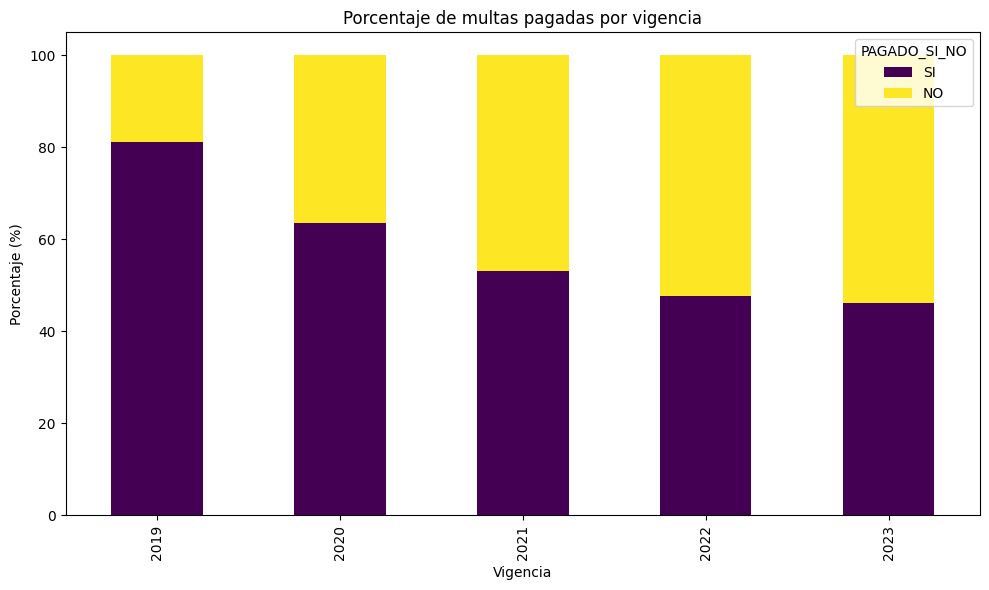

In [ ]:
multas_porcentaje [['SI','NO']].plot(kind='bar', stacked=True,figsize=(10,6), colormap='viridis')
plt.title('Porcentaje de multas pagadas por vigencia')
plt.xlabel('Vigencia')
plt.ylabel('Porcentaje (%)')
plt.tight_layout()
plt.show()

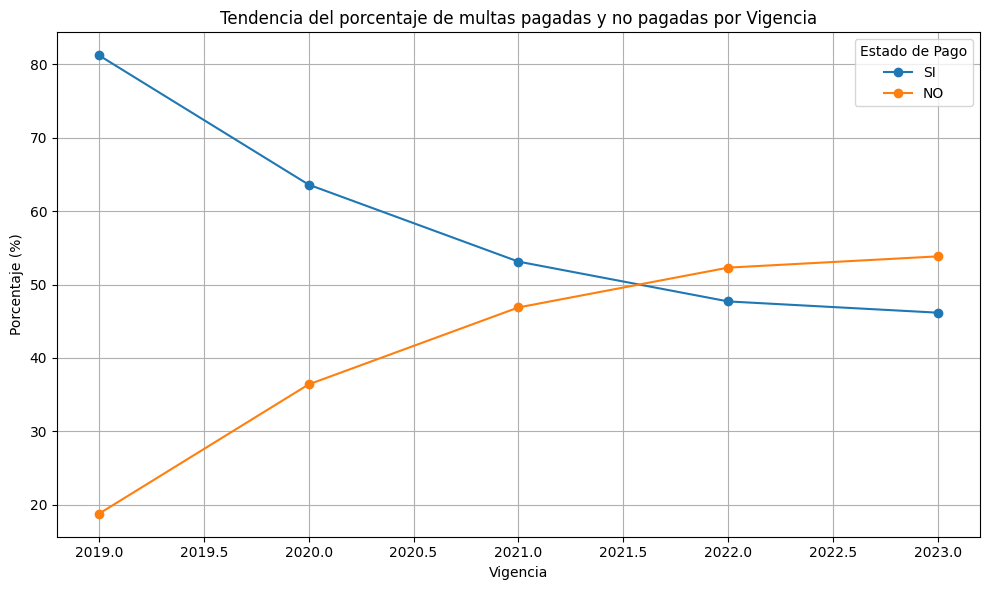

In [ ]:
multas_porcentaje[['SI', 'NO']].plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Tendencia del porcentaje de multas pagadas y no pagadas por Vigencia')
plt.xlabel('Vigencia')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend(title='Estado de Pago')
plt.tight_layout()
plt.show()

In [ ]:
def analyze_department_fines(df, department_name):
    """
    Performs analysis and visualization of fines data for a given department.

    Args:
        df (pd.DataFrame): The input DataFrame containing fines data.
        department_name (str): The name of the department to analyze.
    """
    print(f"Analyzing data for {department_name}...")

    # Filter data for the specified department
    df_department = df[df['DEPARTAMENTO'] == department_name].copy()

    # Data cleaning and transformation
    df_department['VALOR_MULTA'] = df_department['VALOR_MULTA'].astype(str).str.replace(',','',regex=False)
    df_department['VALOR_MULTA'] = pd.to_numeric(df_department['VALOR_MULTA'], errors='coerce')
    df_department['PAGADO_SI_NO_NUM'] = df_department['PAGADO_SI_NO'].apply(lambda x: 1 if x=='SI' else 0)

    # Calculate percentage of paid/unpaid fines by year
    multas_count = df_department.groupby(['VIGENCIA', 'PAGADO_SI_NO']).size().unstack(fill_value=0)
    multas_count['TOTAL'] = multas_count.sum(axis=1)
    multas_porcentaje = multas_count.div(multas_count['TOTAL'], axis=0) * 100

    print(f"\nPercentage of fines paid by year for {department_name}:")
    print(multas_porcentaje)

    # Generate bar plot
    multas_porcentaje[['SI', 'NO']].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Porcentaje de multas pagadas por vigencia en {department_name}')
    plt.xlabel('Vigencia')
    plt.ylabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()

    # Generate line plot
    multas_porcentaje[['SI', 'NO']].plot(kind='line', figsize=(10, 6), marker='o')
    plt.title(f'Tendencia del porcentaje de multas pagadas y no pagadas por Vigencia en {department_name}')
    plt.xlabel('Vigencia')
    plt.ylabel('Porcentaje (%)')
    plt.grid(True)
    plt.legend(title='Estado de Pago')
    plt.tight_layout()
    plt.show()

Analyzing data for Santander...

Percentage of fines paid by year for Santander:
PAGADO_SI_NO         NO         SI  TOTAL
VIGENCIA                                 
2019          35.687170  64.312830  100.0
2020          43.913004  56.086996  100.0
2021          40.593373  59.406627  100.0
2022          43.400687  56.599313  100.0
2023          48.409094  51.590906  100.0


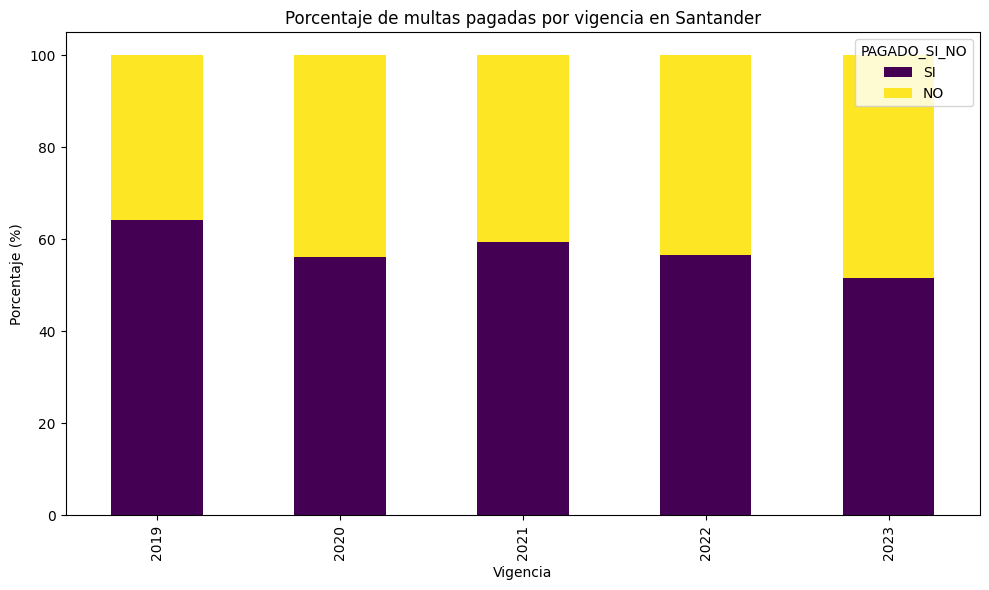

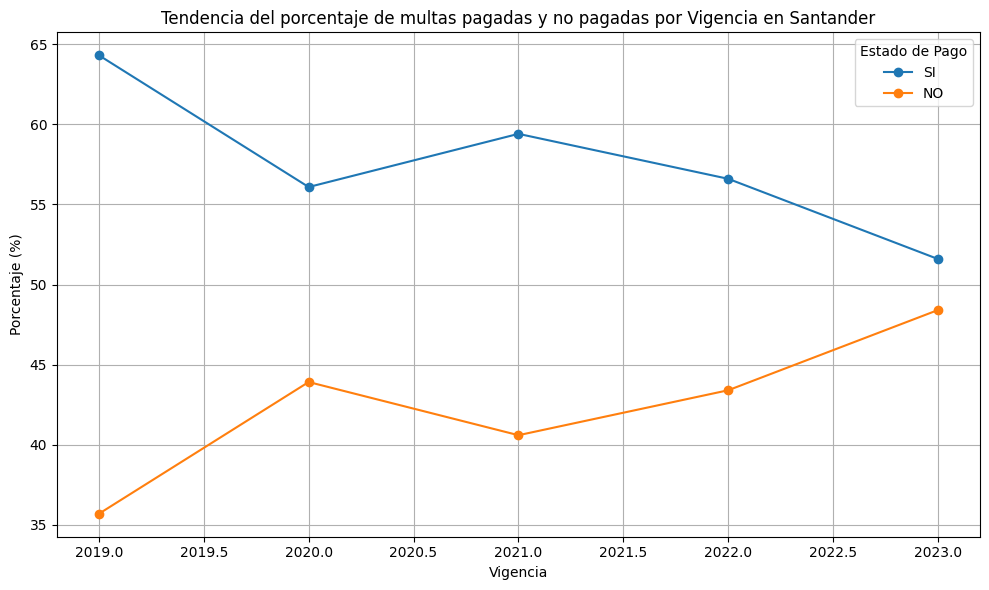

In [ ]:
# Analyze and visualize data for Santander
analyze_department_fines(df, 'Santander')

Analyzing data for Valle del Cauca...

Percentage of fines paid by year for Valle del Cauca:
PAGADO_SI_NO         NO         SI  TOTAL
VIGENCIA                                 
2019          30.798656  69.201344  100.0
2020          42.520759  57.479241  100.0
2021          42.704287  57.295713  100.0
2022          51.647624  48.352376  100.0
2023          68.338654  31.661346  100.0


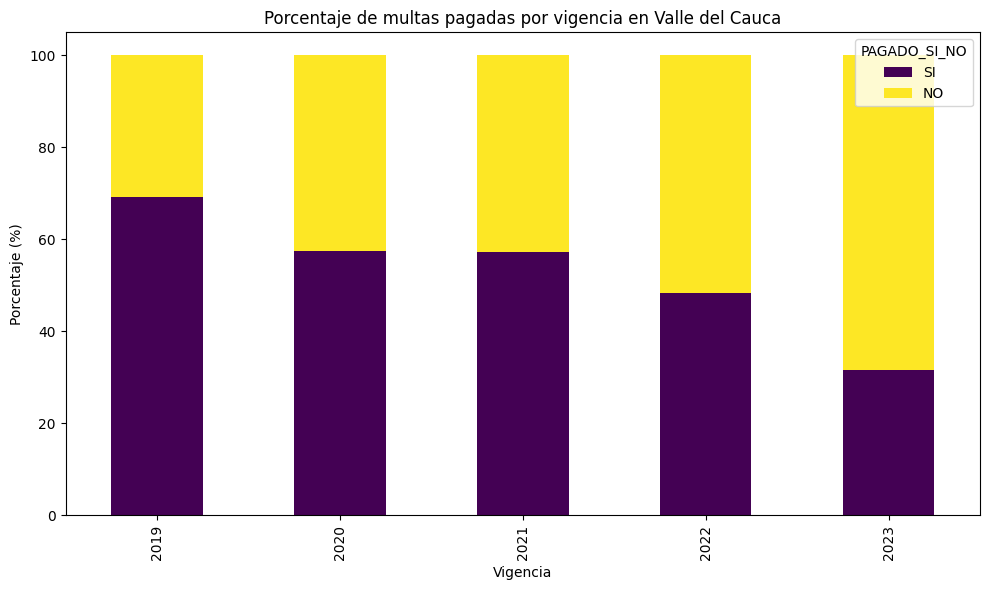

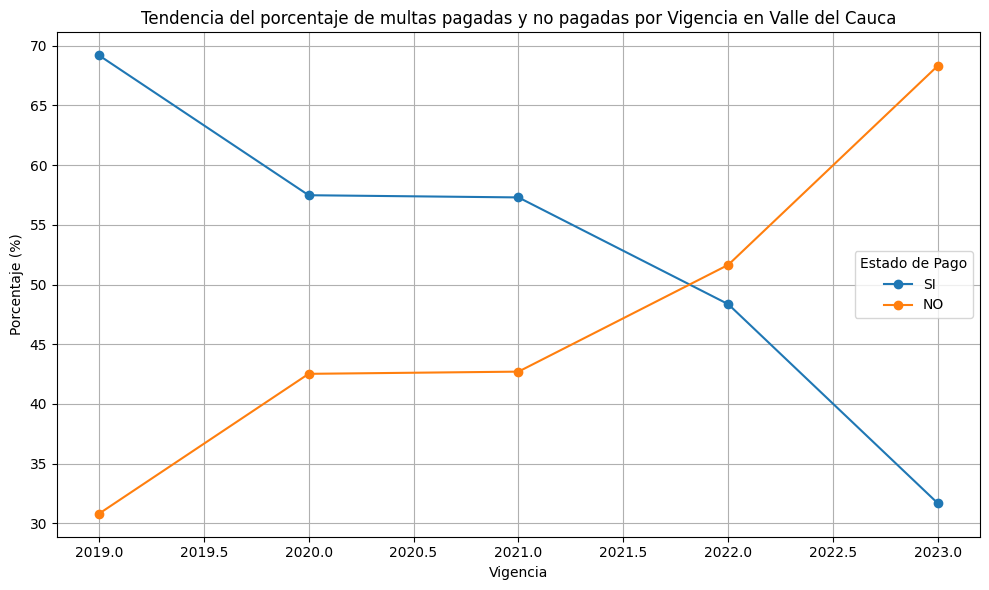

In [ ]:
# Analyze and visualize data for Valle del Cauca
analyze_department_fines(df, 'Valle del Cauca')